<a href="https://colab.research.google.com/github/Puneeth-Abhishek-6622/Round-4-IIITH/blob/main/SER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os

os.listdir("/content/drive/MyDrive/round 4 iit hyd/Indian Emotional Speech Corpora (IESC)")

file_path = "/content/drive/MyDrive/round 4 iit hyd/Indian Emotional Speech Corpora (IESC)"

Data Loading

In [4]:
!pip install --q librosa
!pip install --q mealpy

import pandas as pd
import numpy as np

import os
import sys
import tensorflow as tf
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, BatchNormalization, Dropout, Bidirectional, LSTM, Dense, Attention, Add, Flatten

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.3/386.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 81.3 MB/s eta 0:00:00


In [5]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split


# Define the base directory
base_dir = "/content/drive/MyDrive/round 4 iit hyd/Indian Emotional Speech Corpora (IESC)"

# Initialize lists to store features and labels
features = []
labels = []

# Emotion mapping (based on folder names)
emotion_map = {
    'Anger': 0,
    'Fear': 1,
    'Happy': 2,
    'Neutral': 3,
    'Sad': 4
}


def load_data(base_dir):
  features = []
  labels = []



  for speaker in os.listdir(base_dir):
    speaker_path = os.path.join(base_dir, speaker)
    if os.path.isdir(speaker_path):
      for emotion in os.listdir(speaker_path):
        emotion_path = os.path.join(speaker_path, emotion)
        if os.path.isdir(emotion_path):
          for file in os.listdir(emotion_path):
            if file.endswith(".wav"):
              file_path = os.path.join(emotion_path, file )
              audio , sr = librosa.load(file_path, sr=16000)
              mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13) #exctracting 13 mfcc features per audio file
              mfccs_scaled = np.mean(mfccs.T, axis=0)
              features.append(mfccs_scaled)
              labels.append(emotion_map[emotion])

  return np.array(features), np.array(labels)

features , labels = load_data(base_dir)



In [6]:
print(f"Features shape: {features.shape}")
print(f"Labels shape: {labels.shape}")

Features shape: (400, 13)
Labels shape: (400,)


In [7]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1,

In [8]:
features

array([[-3.0621771e+02,  8.5516487e+01,  3.0160650e+01, ...,
         6.4442426e-01, -5.0611115e+00, -3.1091051e+00],
       [-3.3568051e+02,  8.0729218e+01,  1.6819489e+01, ...,
        -8.3477983e+00, -4.4519138e+00, -2.6075017e+00],
       [-3.5301990e+02,  9.3430397e+01,  1.8866234e+01, ...,
        -3.6993523e+00, -5.3879542e+00, -7.7816665e-01],
       ...,
       [-4.4541031e+02,  5.4380569e+01, -8.8644114e+00, ...,
         6.8959999e-01, -7.8127265e-01,  7.7538878e-01],
       [-3.8323953e+02,  6.8163429e+01, -2.4709684e+01, ...,
        -2.2740991e+00, -5.1378542e-01, -2.4373686e+00],
       [-4.2844629e+02,  5.6702888e+01, -1.3020896e+01, ...,
         3.8860041e-01, -2.9229436e+00,  5.4034686e-01]], dtype=float32)

In [9]:
# Print the first few feature vectors and their corresponding labels
print("First 5 feature vectors:")
for i, feature in enumerate(features[:5]):
    print(f"Sample {i+1}: {feature}")

print("\nFirst 5 labels:")
for i, label in enumerate(labels[:5]):
    print(f"Sample {i+1}: {label}")

# Print the shape of the features and labels arrays
print("\nShape of features array:", features.shape)
print("Shape of labels array:", labels.shape)

# Print the total number of samples
print("\nTotal number of samples:", len(features))

First 5 feature vectors:
Sample 1: [-306.2177       85.51649      30.16065      -6.302739    -15.246192
   -6.0267534    -7.8722806    -2.753611     -8.380329    -10.975119
    0.64442426   -5.0611115    -3.109105  ]
Sample 2: [-335.6805      80.72922     16.819489    -9.078341   -18.069967
    1.2159965  -10.459587   -12.095194    -7.467233   -11.835499
   -8.347798    -4.451914    -2.6075017]
Sample 3: [-3.5301990e+02  9.3430397e+01  1.8866234e+01 -1.2112374e+00
 -1.7915480e+01 -1.6422543e-01 -5.3342252e+00 -9.6961451e+00
 -8.5436125e+00 -1.3528460e+01 -3.6993523e+00 -5.3879542e+00
 -7.7816665e-01]
Sample 4: [-319.85968     91.205795    31.72871    -11.441105   -10.554805
   -6.3713827   -5.126802     2.7696571  -14.428244    -2.8062618
   -3.2250643   -8.428303     1.5278311]
Sample 5: [-350.66788     78.844505    18.476913    -3.5592332  -22.87352
    1.6242903   -1.1588868   -9.210607   -18.592836    -2.5403836
   -4.3601594   -7.0314794    4.5899773]

First 5 labels:
Sample 1: 0


In [10]:
import pandas as pd

# Convert features into a DataFrame
df = pd.DataFrame(features)

# Add a column for labels
df['label'] = labels

# Display first few rows
print(df.head())

# Save the DataFrame as a CSV file (optional)
df.to_csv("emotion_features.csv", index=False)


            0          1          2          3          4         5  \
0 -306.217712  85.516487  30.160650  -6.302739 -15.246192 -6.026753   
1 -335.680511  80.729218  16.819489  -9.078341 -18.069967  1.215997   
2 -353.019897  93.430397  18.866234  -1.211237 -17.915480 -0.164225   
3 -319.859680  91.205795  31.728710 -11.441105 -10.554805 -6.371383   
4 -350.667877  78.844505  18.476913  -3.559233 -22.873520  1.624290   

           6          7          8          9        10        11        12  \
0  -7.872281  -2.753611  -8.380329 -10.975119  0.644424 -5.061111 -3.109105   
1 -10.459587 -12.095194  -7.467233 -11.835499 -8.347798 -4.451914 -2.607502   
2  -5.334225  -9.696145  -8.543612 -13.528460 -3.699352 -5.387954 -0.778167   
3  -5.126802   2.769657 -14.428244  -2.806262 -3.225064 -8.428303  1.527831   
4  -1.158887  -9.210607 -18.592836  -2.540384 -4.360159 -7.031479  4.589977   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  


In [11]:
# Create a DataFrame
df = pd.DataFrame(features)
df['label'] = labels

# Count samples per emotion
emotion_counts = pd.Series(labels).value_counts()

# Convert to DataFrame for better display
emotion_counts_df = pd.DataFrame({'Emotion': [k for k in emotion_map.keys()], 'Number of Samples': emotion_counts})
print(emotion_counts_df)


   Emotion  Number of Samples
0    Anger                 80
4     Fear                 80
2    Happy                 80
3  Neutral                 80
1      Sad                 80


Handling imbalences in the data and adding it into a new test_data folder


In [12]:
# import os
# import shutil

# # Define the base directory
# base_dir = "/content/drive/MyDrive/round 4 iit hyd/Indian Emotional Speech Corpora (IESC)"

# # Define the test directory (where the moved files will go)
# test_dir = os.path.join(base_dir, "Test_Data")

# # Create the test directory if it doesn't exist
# if not os.path.exists(test_dir):
#     os.makedirs(test_dir)

# # Define the number of samples to move from each emotion folder
# samples_to_move = 10

# # Loop through speakers 5 to 8
# for speaker in range(5, 9):
#     speaker_folder = os.path.join(base_dir, f"Speaker-{speaker}")  # Updated folder name format
#     if os.path.exists(speaker_folder):
#         # Loop through each emotion folder
#         for emotion in os.listdir(speaker_folder):
#             emotion_folder = os.path.join(speaker_folder, emotion)
#             if os.path.isdir(emotion_folder):
#                 # Get a list of all .wav files in the emotion folder
#                 audio_files = [f for f in os.listdir(emotion_folder) if f.endswith('.wav')]

#                 # Sort files based on the sample number (2nd part of the filename)
#                 audio_files.sort(key=lambda x: int(x.split('-')[1]))

#                 # Select the last 10 files (highest sample numbers)
#                 files_to_move = audio_files[-samples_to_move:]

#                 # Move the selected files to the test directory
#                 for file in files_to_move:
#                     src_path = os.path.join(emotion_folder, file)
#                     dest_path = os.path.join(test_dir, file)
#                     shutil.move(src_path, dest_path)
#                     print(f"Moved: {file} from {emotion_folder} to {test_dir}")

# print("Done moving files!")

Reorganizing the test folder also with the same architecture

In [13]:
# import os
# import shutil

# # Define the test directory
# test_dir = "/content/drive/MyDrive/round 4 iit hyd/Indian Emotional Speech Corpora (IESC)/Test_Data"

# # Loop through all files in the Test_Data folder
# for file in os.listdir(test_dir):
#     if file.endswith('.wav'):
#         # Extract speaker and emotion from the filename
#         parts = file.split('-')
#         emotion_code = parts[0]  # First part: emotion code (A, S, H, F, N)
#         speaker_number = parts[2]  # Third part: speaker number

#         # Map emotion code to emotion name
#         emotion_map = {'A': 'Angry', 'S': 'Sad', 'H': 'Happy', 'F': 'Fear', 'N': 'Neutral'}
#         emotion_name = emotion_map[emotion_code]

#         # Create speaker folder if it doesn't exist
#         speaker_folder = os.path.join(test_dir, f"Speaker-{speaker_number}")
#         if not os.path.exists(speaker_folder):
#             os.makedirs(speaker_folder)

#         # Create emotion folder inside the speaker folder if it doesn't exist
#         emotion_folder = os.path.join(speaker_folder, emotion_name)
#         if not os.path.exists(emotion_folder):
#             os.makedirs(emotion_folder)

#         # Move the file to the appropriate emotion folder
#         src_path = os.path.join(test_dir, file)
#         dest_path = os.path.join(emotion_folder, file)
#         shutil.move(src_path, dest_path)
#         print(f"Moved: {file} to {dest_path}")

# print("Done organizing test data!")

Training the model

Loading and preprocessing the data

In [14]:
import pandas as pd

# Convert features and labels into a DataFrame
df = pd.DataFrame(features)

# Add the labels column
df['label'] = labels

# Display first few rows

print("\n")

print(df['label'].value_counts())

df.head()



label
0    80
4    80
2    80
3    80
1    80
Name: count, dtype: int64


,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,-306.217712,85.516487,30.160650,-6.302739,-15.246192,-6.026753,-7.872281,-2.753611,-8.380329,-10.975119,0.644424,-5.061111,-3.109105,0
1,-335.680511,80.729218,16.819489,-9.078341,-18.069967,1.215997,-10.459587,-12.095194,-7.467233,-11.835499,-8.347798,-4.451914,-2.607502,0
2,-353.019897,93.430397,18.866234,-1.211237,-17.915480,-0.164225,-5.334225,-9.696145,-8.543612,-13.528460,-3.699352,-5.387954,-0.778167,0
3,-319.859680,91.205795,31.728710,-11.441105,-10.554805,-6.371383,-5.126802,2.769657,-14.428244,-2.806262,-3.225064,-8.428303,1.527831,0
4,-350.667877,78.844505,18.476913,-3.559233,-22.873520,1.624290,-1.158887,-9.210607,-18.592836,-2.540384,-4.360159,-7.031479,4.589977,0


In [31]:
#This ensures all features have a mean of 0 and a standard deviation of 1, making training more stable.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(df.iloc[:, :-1])  # Normalize only feature columns

# Convert back to DataFrame
df_scaled = pd.DataFrame(features_scaled)
df_scaled['label'] = df['label']

df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,1.153807,0.094064,0.981764,-0.769187,-0.917453,0.072794,0.555671,0.733831,0.285873,-0.422913,1.006160,0.126218,0.036263,0
1,0.728418,-0.064383,0.394961,-0.904987,-1.186541,0.624949,0.318791,-0.025188,0.365926,-0.530094,-0.093428,0.192144,0.124126,0
2,0.478069,0.355997,0.484986,-0.520078,-1.171820,0.519727,0.788042,0.169739,0.271557,-0.740992,0.474994,0.090848,0.444559,0
3,0.956842,0.282367,1.050734,-1.020589,-0.470394,0.046521,0.807032,1.182605,-0.244362,0.594712,0.532991,-0.238170,0.848486,0
4,0.512028,-0.126763,0.467862,-0.634957,-1.644289,0.656075,1.170313,0.209190,-0.609481,0.627834,0.394189,-0.087010,1.384863,0


In [32]:
# splitting the data into train and test sets

from sklearn.model_selection import train_test_split

X = df_scaled.iloc[:, :-1]  # Features
y = df_scaled['label']  # Labels

# Splitting data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])


Training Samples: 320
Testing Samples: 80


In [33]:
from tensorflow.keras.utils import to_categorical
import numpy as np

y_train_categorical = to_categorical(y_train, num_classes=5)  # 5 emotions
y_test_categorical = to_categorical(y_test, num_classes=5)


Training a basic ml model

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Show classification report
print(classification_report(y_test, y_pred))


Test Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.71      0.94      0.81        16
           1       0.79      0.69      0.73        16
           2       0.77      0.62      0.69        16
           3       0.71      0.75      0.73        16
           4       0.80      0.75      0.77        16

    accuracy                           0.75        80
   macro avg       0.76      0.75      0.75        80
weighted avg       0.76      0.75      0.75        80



SVM

In [47]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
svm_accuracy = accuracy_score(y_test, y_pred_svm)




SVM Accuracy: 0.70


XG Boost

In [46]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")

xgboost_accuracy = accuracy_score(y_test, y_pred_xgb)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:59:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.79


using deep learning models

In [21]:
#Prepare Data for Deep Learning
import numpy as np
from tensorflow.keras.utils import to_categorical

# Reshape data for deep learning models
X_train = np.array(X_train).reshape(-1, 13, 1)  # 13 MFCCs, single-channel input
X_test = np.array(X_test).reshape(-1, 13, 1)

# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)


In [22]:
# building the cnn model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Build CNN model
cnn_model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(13, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')  # 5 classes
])

# Compile model
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
cnn_model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - accuracy: 0.2080 - loss: 1.6257 - val_accuracy: 0.3000 - val_loss: 1.5207
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3794 - loss: 1.5117 - val_accuracy: 0.4625 - val_loss: 1.4477
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4412 - loss: 1.4207 - val_accuracy: 0.5375 - val_loss: 1.3636
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5233 - loss: 1.3658 - val_accuracy: 0.4875 - val_loss: 1.2932
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4902 - loss: 1.3234 - val_accuracy: 0.5750 - val_loss: 1.2359
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6219 - loss: 1.2067 - val_accuracy: 0.6000 - val_loss: 1.1508
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5639 - loss: 1.1853 - val_accuracy: 0.6250 - val_loss: 1.0990
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6497 - loss: 1.0599 - val_accuracy: 0.6125 - val_los

In [23]:
#LSTM Model

from tensorflow.keras.layers import LSTM

# Build LSTM model
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(13, 1)),
    LSTM(64),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')  # 5 emotion classes
])

# Compile model
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
lstm_model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.2226 - loss: 1.6049 - val_accuracy: 0.2750 - val_loss: 1.6052
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2360 - loss: 1.5975 - val_accuracy: 0.2500 - val_loss: 1.5928
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2832 - loss: 1.5757 - val_accuracy: 0.2875 - val_loss: 1.5793
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2773 - loss: 1.5733 - val_accuracy: 0.3125 - val_loss: 1.5713
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3541 - loss: 1.5662 - val_accuracy: 0.3000 - val_loss: 1.5451
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3378 - loss: 1.5209 - val_accuracy: 0.3625 - val_loss: 1.5199
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3600 - loss: 1.4926 - val_accuracy: 0.3125 - val_loss: 1.5398
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3891 - loss: 1.4884 - val_accuracy: 0.3250 - v

In [24]:
cnn_acc = cnn_model.evaluate(X_test, y_test)[1]
lstm_acc = lstm_model.evaluate(X_test, y_test)[1]

print(f"CNN Test Accuracy: {cnn_acc:.2f}")
print(f"LSTM Test Accuracy: {lstm_acc:.2f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 351ms/step - accuracy: 0.7930 - loss: 0.6528
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6422 - loss: 0.9985 
CNN Test Accuracy: 0.81
LSTM Test Accuracy: 0.61


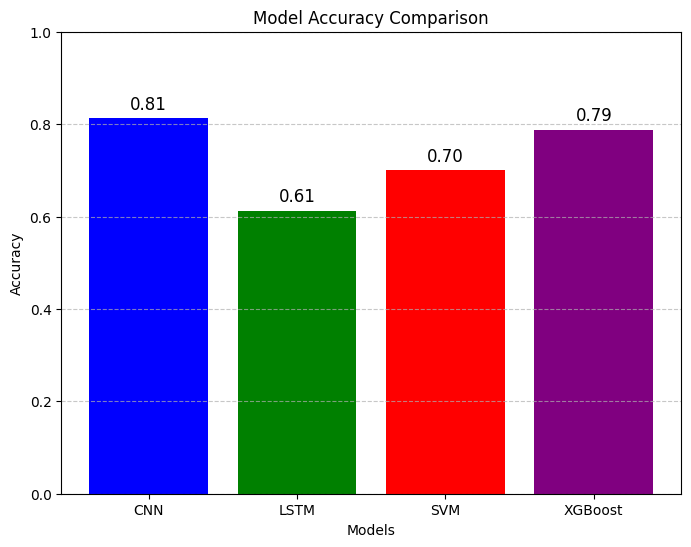

In [48]:
import matplotlib.pyplot as plt

# Accuracy values (replace with your actual results)
model_names = ["CNN", "LSTM", "SVM", "XGBoost"]
accuracy_scores = [cnn_acc, lstm_acc, svm_accuracy, xgboost_accuracy]  # Make sure these are defined

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'red', 'purple'])

# Labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)  # Accuracy ranges between 0 and 1
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show accuracy values on bars
for i, acc in enumerate(accuracy_scores):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=12)

# Show plot
plt.show()


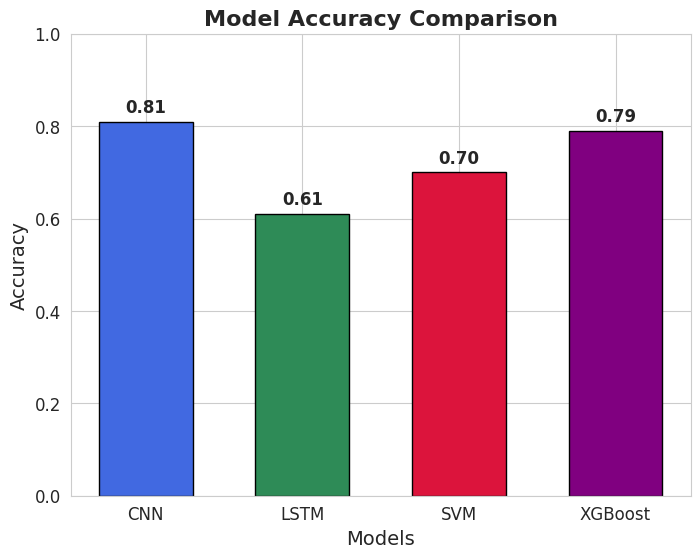

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy values (replace with your actual results)
model_names = ["CNN", "LSTM", "SVM", "XGBoost"]
accuracy_scores = [0.81, 0.61, 0.70, 0.79]  # Replace with your actual accuracies

# Set seaborn style
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

# Bar chart with colors and edge color
bars = plt.bar(model_names, accuracy_scores, color=['royalblue', 'seagreen', 'crimson', 'purple'], edgecolor='black', width=0.6)

# Labels and title
plt.xlabel("Models", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Model Accuracy Comparison", fontsize=16, fontweight='bold')
plt.ylim(0, 1)  # Accuracy ranges between 0 and 1
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show accuracy values on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.2f}", ha='center', fontsize=12, fontweight='bold')

# Show plot
plt.show()
